In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
DATASET_FILENAME = 'DT-BrainCancer.csv'
brain_cancer_df = pd.read_csv(DATASET_FILENAME)
brain_cancer_df = brain_cancer_df.drop(columns=['Unnamed: 0'])
brain_cancer_df

,sex,diagnosis,loc,ki,gtv,status
0,Female,Meningioma,Infratentorial,90,6.11,0
1,Male,HG glioma,Supratentorial,90,19.35,1
2,Female,Meningioma,Infratentorial,70,7.95,0
3,Female,LG glioma,Supratentorial,80,7.61,1
4,Male,HG glioma,Supratentorial,90,5.06,1
...,...,...,...,...,...,...
83,Male,HG glioma,Supratentorial,80,0.16,1
84,Male,HG glioma,Supratentorial,80,19.81,1
85,Male,Meningioma,Supratentorial,90,2.50,0
86,Male,Meningioma,Supratentorial,90,2.02,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Select columns with object or category dtype (typically categorical)
cat_cols = brain_cancer_df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    brain_cancer_df[col] = encoder.fit_transform(brain_cancer_df[col])

brain_cancer_df.head()

,sex,diagnosis,loc,ki,gtv,status
0,0,2,0,90,6.11,0
1,1,0,1,90,19.35,1
2,0,2,0,70,7.95,0
3,0,1,1,80,7.61,1
4,1,0,1,90,5.06,1


In [ ]:
from sklearn.model_selection import train_test_split

X = brain_cancer_df.drop(columns=['status'])
y = brain_cancer_df['status']

#Train
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
#Test and eval
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (61, 5)
Validation: (13, 5)
Test: (14, 5)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_val_pred = classifier.predict(X_val)
accuracy = (y_val_pred == y_val).mean()
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.4615


In [ ]:
best_val_accuracy = 0
best_depth = None
for depth in range(2, 11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0, min_samples_split=5)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_accuracy = (y_val_pred == y_val).mean()
    print(f"max_depth={depth}, Validation Accuracy={val_accuracy:.4f}")
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_depth = depth
print(f"\nBest max_depth: {best_depth} with Validation Accuracy: {best_val_accuracy:.4f}")


max_depth=2, Validation Accuracy=0.6923
max_depth=3, Validation Accuracy=0.6923
max_depth=4, Validation Accuracy=0.6154
max_depth=5, Validation Accuracy=0.6154
max_depth=6, Validation Accuracy=0.6154
max_depth=7, Validation Accuracy=0.5385
max_depth=8, Validation Accuracy=0.5385
max_depth=9, Validation Accuracy=0.5385
max_depth=10, Validation Accuracy=0.5385

Best max_depth: 2 with Validation Accuracy: 0.6923


In [ ]:
final_dt = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)
final_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [ ]:
#prediction on Test Set
y_test_pred = final_dt.predict(X_test)

In [ ]:
accuracy_dt = (y_test_pred == y_test).mean()
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.4615


In [ ]:
y_true = y_test.to_numpy()
y_pred = y_test_pred

In [ ]:
#Confusion Matrix
def confusion_matrix_manual(y_true, y_pred):
    classes = np.unique(y_true)
    n_classes = len(classes)
    matrix = np.zeros((n_classes, n_classes), dtype=int)
    for actual, pred in zip(y_true, y_pred):
        matrix[actual][pred] += 1
    return matrix
cm = confusion_matrix_manual(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[4 4]
 [3 3]]


In [ ]:
def calculate_metrics(cm):
    # cm assumed shape (2, 2)
    TN, FP = cm[0, 0], cm[0, 1]
    FN, TP = cm[1, 0], cm[1, 1]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1-Score = {f1:.4f}")

    return precision, recall, f1

precision_dt, recall_dt, f1_dt = calculate_metrics(cm)

Precision = 0.4286
Recall = 0.5000
F1-Score = 0.4615


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_val_pred_xgb = xgb_model.predict(X_val)
val_accuracy_xgb = (y_val_pred_xgb == y_val).mean()
print(f"XGBoost Validation Accuracy: {val_accuracy_xgb:.4f}")

XGBoost Validation Accuracy: 0.6154


In [ ]:
best_val_accuracy = 0
best_depth = None
for depth in range(2, 11):
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                          max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_accuracy = (y_val_pred == y_val).mean()
    print(f"max_depth={depth}, Validation Accuracy={val_accuracy:.4f}")
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_depth = depth
print(f"\nBest max_depth: {best_depth} with Validation Accuracy: {best_val_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


max_depth=2, Validation Accuracy=0.6923


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


max_depth=3, Validation Accuracy=0.6154
max_depth=4, Validation Accuracy=0.6154
max_depth=5, Validation Accuracy=0.6154


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


max_depth=6, Validation Accuracy=0.6154
max_depth=7, Validation Accuracy=0.6154
max_depth=8, Validation Accuracy=0.6154


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


max_depth=9, Validation Accuracy=0.6154
max_depth=10, Validation Accuracy=0.6154

Best max_depth: 2 with Validation Accuracy: 0.6923


In [ ]:
final_xgb = XGBClassifier(max_depth=2, eval_metric='mlogloss', random_state=0)
final_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_test_pred_xgb = final_xgb.predict(X_test)
accuracy_xgb = (y_test_pred_xgb == y_test).mean()
print(f"XGBoost Test Accuracy: {accuracy_xgb:.4f}")

XGBoost Test Accuracy: 0.7143


In [ ]:
cm_xgb = confusion_matrix_manual(y_test.to_numpy(), y_test_pred_xgb)
print("XGBoost Confusion Matrix:")
print(cm_xgb)

XGBoost Confusion Matrix:
[[5 3]
 [1 5]]


In [ ]:
precision_xgb, recall_xgb, f1_xgb = calculate_metrics(cm_xgb)

Precision = 0.6250
Recall = 0.8333
F1-Score = 0.7143


In [ ]:
y_test_probs_dt = final_dt.predict_proba(X_test)
y_test_probs_xgb = final_xgb.predict_proba(X_test)

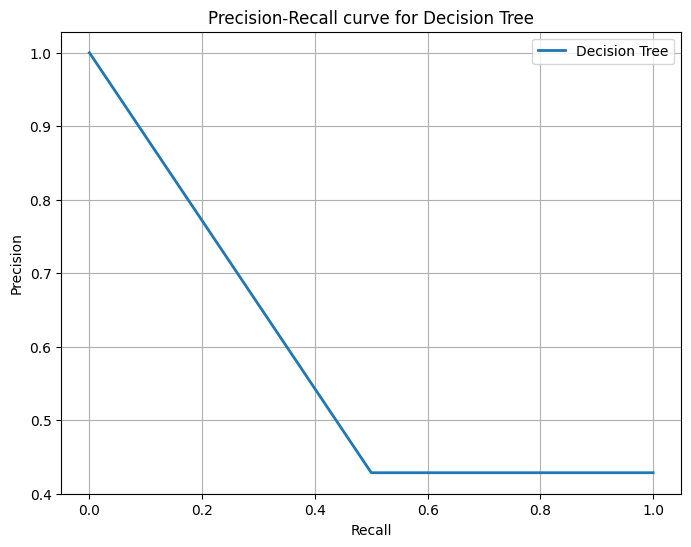

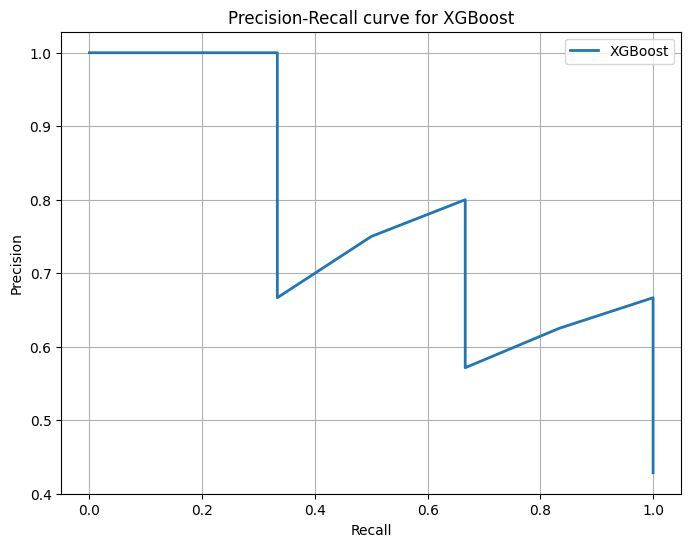

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_pr_curve_binary(y_true, y_probs, model_name):

    precision, recall, _ = precision_recall_curve(y_true, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, lw=2, label=f'{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

y_test_pos_probs_dt = y_test_probs_dt[:, 1]
y_test_pos_probs_xgb = y_test_probs_xgb[:, 1]

plot_pr_curve_binary(y_test, y_test_pos_probs_dt, "Decision Tree")
plot_pr_curve_binary(y_test, y_test_pos_probs_xgb, "XGBoost")

In [ ]:
metrics_dict = {
    'Model': ['Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_dt, accuracy_xgb],
    'Precision': [precision_dt, precision_xgb],
    'Recall': [recall_dt, recall_xgb],
    'F1-Score': [f1_dt, f1_xgb]
}

metrics_dict

{'Model': ['Decision Tree', 'XGBoost'],
 'Accuracy': [np.float64(0.5), np.float64(0.7142857142857143)],
 'Precision': [np.float64(0.42857142857142855), np.float64(0.625)],
 'Recall': [np.float64(0.5), np.float64(0.8333333333333334)],
 'F1-Score': [np.float64(0.4615384615384615), np.float64(0.7142857142857143)]}